# Week 1 

In [1]:
import pandas as pd
import numpy as np
import re

In [156]:
def writeAnswer(answer):
    ! touch answer.txt
    with open("answer.txt", "w") as f:
        f.write(answer)

In [151]:
with open("sentences.txt") as f:
    
    sentences = f.read()

In [153]:
! head -n 3 sentences.txt

In comparison to dogs, cats have not undergone major changes during the domestication process.
As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.
A common interactive use of cat for a single file is to output the content of a file to standard output.


In [89]:
sentences = sentences.lower()

In [91]:
sentences = sentences.split("\n")

In [93]:
sentences = sentences[:-1]

In [94]:
cleaned_sentences = []
for i in sentences:
    i = re.split('[^a-z]', i)
    i = [x for x in i if len(x) != 0]
    cleaned_sentences.append(i)

In [95]:
unique = sum(cleaned_sentences, [])
unique = list(set(unique))
unique_words = {}
for w in range(len(unique)):
    unique_words[unique[w]] = w

In [96]:
count_matrix = np.zeros((len(cleaned_sentences), len(unique_words)))

In [97]:
count_matrix.shape

(22, 254)

In [98]:
len(cleaned_sentences)

22

In [99]:
dictionary = {x:{} for x in range(len(cleaned_sentences))}

In [100]:
for sentence in range(len(cleaned_sentences)):
    if sentence in dictionary:
        for word in cleaned_sentences[sentence]:
            if word in dictionary[sentence]:
                dictionary[sentence][unique_words[word]] += 1
            else:
                dictionary[sentence][unique_words[word]] = 1

In [101]:
for sentence in dictionary:
    for unique_word in dictionary[sentence]:
        count_matrix[sentence, unique_word] = dictionary[sentence][unique_word]

In [102]:
first_sencence = count_matrix[0]
count_matrix = count_matrix[1:]

In [103]:
from scipy.spatial.distance import cosine

In [114]:
distance = []
for sentence in range(21):
    distance.append(cosine(first_sencence, count_matrix[sentence]))
    print(sentence+1, cosine(first_sencence, count_matrix[sentence]))    

(1, 0.94023856953328033)
(2, 0.86198688813152913)
(3, 0.88854435748492944)
(4, 0.80553888293435061)
(5, 0.93517962764478357)
(6, 0.7547442642060137)
(7, 0.91548457452714838)
(8, 0.90695157896015288)
(9, 0.88335763129603917)
(10, 0.87035925528956715)
(11, 0.87035925528956715)
(12, 0.8773721321030068)
(13, 0.87035925528956715)
(14, 0.86198688813152913)
(15, 0.94023856953328033)
(16, 0.85361498905772004)
(17, 0.95037083330145344)
(18, 0.94427217874246472)
(19, 0.94023856953328033)
(20, 0.84275727449171223)
(21, 0.82503644694405864)


In [143]:
import heapq
np.array(heapq.nsmallest(2, xrange(len(distance)), key=distance.__getitem__))+1

array([6, 4])

In [157]:
writeAnswer("4 6")

## Task 2

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/YzsaOcqaEeW9HA7NOZMxaw_3d529582665934cff77bbcf55a28e43c_image01.png?expiry=1498867200000&hmac=8oT3ooNeNYOuxY1xSNjU8N26Oo1FOntKz2GNrW6KDOE)


Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [224]:
from __future__ import division
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [225]:
X = np.array([x for x in range(1, 16)])
y = np.array([f(x) for x in X])
b = np.ones(len(y))

In [226]:
matrix = np.column_stack((b, X))

In [227]:
def prediction(matrix):
    w = np.dot(np.dot(np.linalg.inv(np.dot(matrix.T, matrix)), matrix.T), y)
    y_hat = np.dot(w, matrix.T)
    return w, y_hat

In [228]:
matrix_2 = np.column_stack((b, X, X**2))
matrix_3 = np.column_stack((b, X, X**2, X**3))

w_2, y_hat_2 = prediction(matrix_2)
w_3, y_hat_3 = prediction(matrix_3)

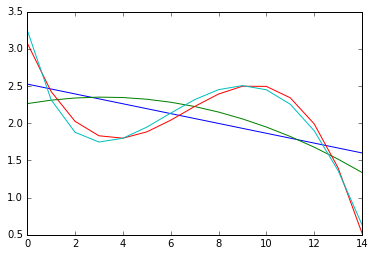

In [229]:
plt.plot(y_hat)
plt.plot(y_hat_2)
plt.plot(y_hat_3)
plt.plot(y);

In [230]:
writeAnswer(' '.join(map(str, [round(i, 2) for i in w_3])))

In [237]:
x = [1, 15]
y = [f(i) for i in x]
b = np.ones(len(y))
X = np.column_stack((b, x))

scipy.linalg.solve(X, y)

array([ 3.43914511, -0.18692825])

In [239]:
x = np.array([1, 8, 15])
y = [f(i) for i in x]
b = np.ones(len(y))
X = np.column_stack((b, x, x**2))
scipy.linalg.solve(X, y)

array([ 3.32512949, -0.06531159, -0.00760104])

In [241]:
x = np.array([1, 4, 10, 15])
y = [f(i) for i in x]
b = np.ones(len(y))
X = np.column_stack((b, x, x**2, x**3))
scipy.linalg.solve(X, y)

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [243]:
writeAnswer("4.36264154 -1.29552587  0.19333685 -0.00823565")